# Modèles de Machine Learning sur 2 classes (saine/malade) pour les images segmentée de Plant Village

## 0 Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split

## 1 Préparation des données

### 1.1 Installation du Drive

In [2]:
#Pour Google Colab, installation du drive
#Installation du drive
from google.colab import drive
drive.mount('/content/drive')
#Attention, attendre que le Drive soit réellement monté avant de poursuivre

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.1 Création du dataFrame à partir du fichier df_HistInt_PV.csv

In [3]:
#Chemin du fichier df_HistInt_PV.csv
ficHistInt_csv = "/content/drive/MyDrive/ProjetPlantes/Donnees/df_HistInt_PV.csv"
dtype = {'Suffixe': str,'Luminosite': str}
df_HistInt_PV = pd.read_csv(ficHistInt_csv, dtype=dtype)
df_HistInt_PV.head()

,Categorie,Plante,Maladie,Saine,0,1,2,3,4,5,...,698,699,700,701,702,703,704,705,706,707
0,Apple__Apple_scab,Apple,Apple_scab,0,327.0,317.0,346.0,301.0,293.0,286.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Apple__Apple_scab,Apple,Apple_scab,0,565.0,546.0,496.0,461.0,469.0,431.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Apple__Apple_scab,Apple,Apple_scab,0,575.0,616.0,578.0,557.0,543.0,560.0,...,30.0,25.0,23.0,34.0,16.0,24.0,21.0,17.0,25.0,15.0
3,Apple__Apple_scab,Apple,Apple_scab,0,71.0,94.0,64.0,44.0,53.0,49.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Apple__Apple_scab,Apple,Apple_scab,0,149.0,147.0,157.0,134.0,164.0,151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_HistInt_PV.shape

(54302, 712)

### 1.2 Répartition des données

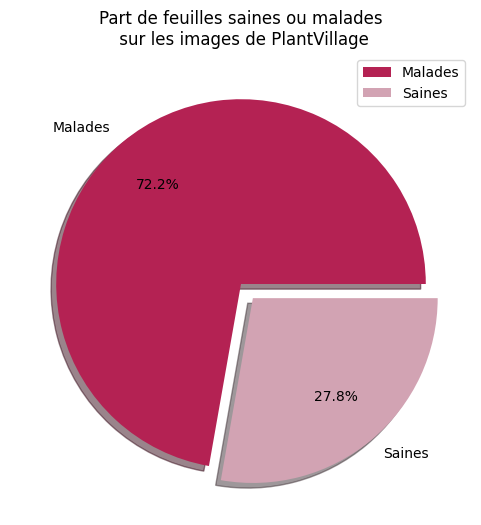

In [5]:
#Répartition des feuilles saines/malades pour les images de Plant Village
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 6))

plt.pie(x=df_HistInt_PV['Saine'].value_counts(),
        labels=['Malades', 'Saines'],
        colors=['#b42253','#d2a3b3'],
        explode=[0, 0.1],
        autopct='%1.1f%%',
        pctdistance=0.7,
        labeldistance=1.1,
        shadow=True)
plt.title("Part de feuilles saines ou malades\n sur les images de PlantVillage")
plt.legend();

In [6]:
#Préparation des tables target et data pour équilibrer les nombres de feuilles entre saines/malades
target = df_HistInt_PV['Saine']
#suppression de toutes les colonnes autres que celles des histogrammes d'intensité
colonnes = ['Categorie','Plante','Maladie','Saine']
data = df_HistInt_PV.drop(colonnes,axis=1)

### 1.3 Undersampling des données

In [7]:
#Les classes ne sont pas équilibrées, on va faire de l'undersampling
rus = RandomUnderSampler()

In [8]:
#Undersampling des données
data_red, target_red = rus.fit_resample(data,target)
#Nb d'éléments par classe
target_red.value_counts()

0    15082
1    15082
Name: Saine, dtype: int64

### 1.4 Séparation des données

In [9]:
#Le jeu de données PlantVillage n'a pas de jeux de données train et valid distincts. Il faut faire la séparation pour avoir ces 2 jeux.
X_train, X_test, y_train, y_test = train_test_split(data_red, target_red, test_size=0.2)

## 2 Classification
### 2.1 Modèle de classification Random Forest

In [10]:
#Modèle de classification Random Forest
modelRF = RandomForestClassifier(n_jobs = -1)
# Entraînement
modelRF.fit(X_train,y_train)
# Prédiction
test_pred_RF = modelRF.predict(X_test)
score_RF = accuracy_score(y_test,test_pred_RF)
print("Le score de précision est : ",score_RF*100, "%")


Le score de précision est :  89.97182164760484 %


In [11]:
# Compte-rendu évaluatif détaillé de la classification Random Forest
print("compte rendu évaluatif détaillé de la classification Random Forest \n", classification_report(y_test,test_pred_RF))
# matrice de confusion
pd.crosstab(y_test, test_pred_RF, rownames=['Classe réelle'], colnames=['Classe prédite'])

compte rendu évaluatif détaillé de la classification Random Forest 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      3001
           1       0.89      0.91      0.90      3032

    accuracy                           0.90      6033
   macro avg       0.90      0.90      0.90      6033
weighted avg       0.90      0.90      0.90      6033



Classe prédite,0,1
Classe réelle,,
0,2677,324
1,281,2751


### 2.2 Modèle de classification par SVM

In [ ]:
#Modèle de classification SVM
modelSVM = SVC(gamma=0.01, kernel = 'poly')
# Entraînement
modelSVM.fit(X_train,y_train)
# Prédiction
test_pred_SVM = modelSVM.predict(X_test)
score_SVM = accuracy_score(y_test,test_pred_SVM)
print("Le score de précision est : ",score_SVM*100, "%")

Le score de précision est :  82.92723354881485 %


In [ ]:
# Compte-rendu évaluatif détaillé de la classification SVM
print("compte rendu évaluatif détaillé de la classification SVM \n", classification_report(y_test,test_pred_SVM))
# matrice de confusion
pd.crosstab(y_test, test_pred_SVM, rownames=['Classe réelle'], colnames=['Classe prédite'])

compte rendu évaluatif détaillé de la classification SVM 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      3001
           1       0.83      0.82      0.83      3032

    accuracy                           0.83      6033
   macro avg       0.83      0.83      0.83      6033
weighted avg       0.83      0.83      0.83      6033



Classe prédite,0,1
Classe réelle,,
0,2506,495
1,535,2497
